### Import Dataset

Import both good and bad dataset seprately into 2 different DataFrame

In [1]:
import pandas as pd

g_csv_name = "Good_Nozzle_set1"
b_csv_name = "Worst_Nozzle_set3"

g_df = pd.read_csv(f"../data/{g_csv_name}.csv")
b_df = pd.read_csv(f"../data/{b_csv_name}.csv")


### Filter specific range of data

Monitor the Cold Spray Machine's parameter values after all the parameters have stabilized for at least 5 minutes.

In [2]:
from datetime import datetime, timedelta

# Define good nozzle time range
# g_start_time = "3:48:00 am"
# g_end_time = "3:50:59 am"

# Good_Nozzle_set1.csv
g_start_time = "4:47:00 pm"
g_end_time = "4:51:59 pm"

g_nozzle_df = g_df[
    (g_df["Time"] >= g_start_time) &
    (g_df["Time"] <= g_end_time)
].reset_index(drop=True)

print(f"Number of data points for good nozzle: {len(g_nozzle_df)}")
print(f"Duration of recording of good nozzle (mins): {len(g_nozzle_df) / 60:.2f} mins")

# Worst_Nozzle_set1.csv
# b_start_time = "6:10:00 pm"
# b_end_time = "6:14:59 pm"

# Bad_Nozzle_set1.csv
# b_start_time = "4:28:00 pm"
# b_end_time = "4:32:59 pm"

# Bad_Nozzle_set2.csv
# b_start_time = "11:37:00 am"
# b_end_time = "11:41:59 am"

# Worst_Nozzle_set1.csv
# b_start_time = "6:10:00 pm"
# b_end_time = "6:14:59 pm"

# Worst_Nozzle_set2.csv
# b_start_time = "10:59:00 am"
# b_end_time = "11:03:59 am"

# Worst_Nozzle_set2.csv
b_start_time = "11:13:00 am"
b_end_time = "11:17:59 am"

b_nozzle_df = b_df[
    (b_df["Time"] >= b_start_time) &
    (b_df["Time"] <= b_end_time)
].reset_index(drop=True)

print(f"Number of data points for bad nozzle: {len(b_nozzle_df)}")
print(f"Duration of recording of bad nozzle (mins): {len(b_nozzle_df) / 60:.2f} mins")




b_nozzle_df.head()

Number of data points for good nozzle: 300
Duration of recording of good nozzle (mins): 5.00 mins
Number of data points for bad nozzle: 300
Duration of recording of bad nozzle (mins): 5.00 mins


,Date,Time,ms,Data_Type,ABB_X,ABB_Y,ABB_Z,Chamber_Temp,Chamber_Pressure,Main_Gas_Flow,PF1_Gas_Flow,PF2_Gas_Flow,PF1_LibraWeight,PF2_LibraWeight,PF1_Pressure,PF2_Pressure
0,5/12/2024,11:13:00 am,0,Double[12],0,0,0,1000,4.998,1782,299.9,0,62.26,62.6,5.180,0.000
1,5/12/2024,11:13:01 am,0,Double[12],0,0,0,1000,4.998,1782,300.2,0,62.26,62.6,5.182,0.000
2,5/12/2024,11:13:02 am,0,Double[12],0,0,0,1000,4.998,1779,299.9,0,62.26,62.6,5.182,0.002
3,5/12/2024,11:13:03 am,0,Double[12],0,0,0,1000,4.998,1779,299.9,0,62.26,62.6,5.182,0.002
4,5/12/2024,11:13:04 am,0,Double[12],0,0,0,1000,4.998,1773,298.7,0,62.26,62.6,5.182,0.000


### Exploratory Data Analysis (EDA)

In [3]:
import matplotlib.pyplot as plt

def plot_columns_in_grid_overlay(good_df, bad_df, y_columns, nrows=1, ncols=3, figsize=(15, 5), graph_name="results.png"):
    """
    Plots multiple columns from two DataFrames ("good" and "bad") in a grid of subplots,
    overlaying the corresponding variables for comparison.

    Parameters:
        good_df (pd.DataFrame): The DataFrame containing the "good" data.
        bad_df (pd.DataFrame): The DataFrame containing the "bad" data.
        y_columns (list): List of column names to plot.
        nrows (int): Number of rows in the grid.
        ncols (int): Number of columns in the grid.
        figsize (tuple): Figure size.

    Returns:
        None
    """
    # Create a grid of subplots
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    axes = axes.flatten()  # Flatten the 2D array of axes for easier iteration

    # Plot each column in the corresponding subplot
    for i, column in enumerate(y_columns):
        if i < len(axes):  # Avoid indexing errors
            ax = axes[i]

            # Plot data from the "good" DataFrame
            if column in good_df.columns:
                ax.plot(good_df[column], marker='.', label=f"Good - {column}", alpha=0.7, color='g')

            # Plot data from the "bad" DataFrame
            if column in bad_df.columns:
                ax.plot(bad_df[column], marker='.', label=f"Bad - {column}", alpha=0.7, color='r')

            # Set title and labels
            ax.set_title(column, fontsize=10)
            ax.legend(fontsize=8)
            ax.grid(True)
            ax.get_xaxis().set_visible(False)  # Hide x-axis
            ax.set_ylabel(column, fontsize=8)

    # Remove unused subplots
    for i in range(len(y_columns), len(axes)):
        fig.delaxes(axes[i])

    # Adjust layout
    plt.tight_layout()
    plt.savefig(graph_name, format="png", dpi=300, bbox_inches="tight")
    plt.show()

# Example usage:
# plot_columns_in_grid_overlay(good_df, bad_df, y_columns=["Column1", "Column2"], nrows=2, ncols=3)


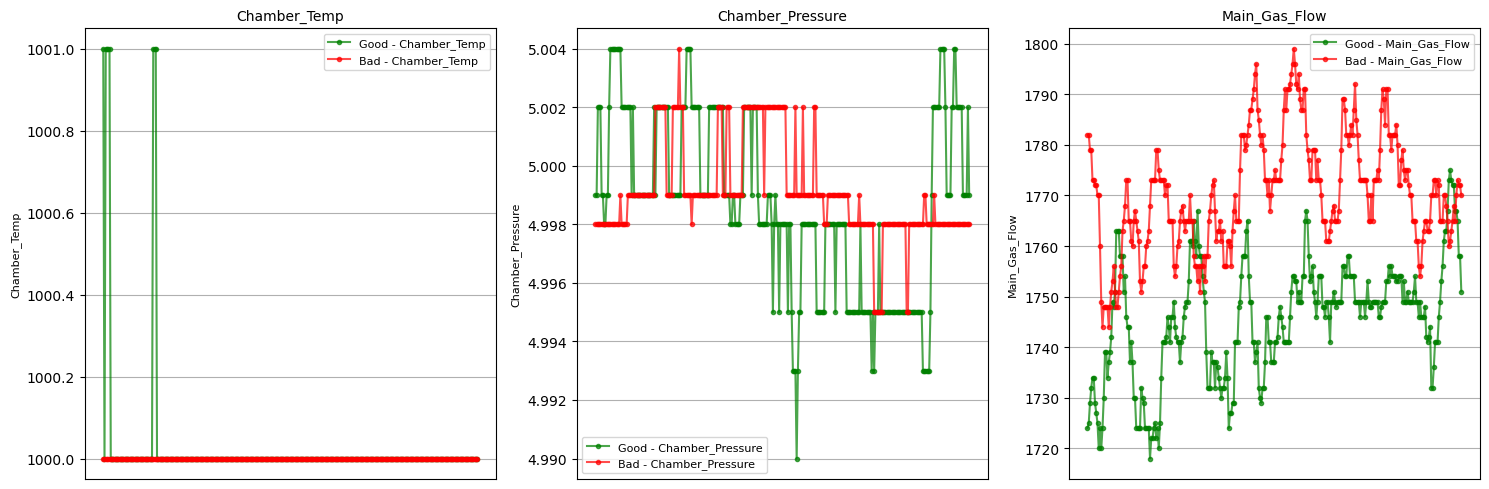

In [4]:
# List of columns for y-axis
y_columns = ["Chamber_Temp", "Chamber_Pressure", "Main_Gas_Flow"]
plot_columns_in_grid_overlay(g_nozzle_df, b_nozzle_df, y_columns, nrows=1, ncols=3, figsize=(15, 5), graph_name=f"../graphs/{g_csv_name}-vs-{b_csv_name}_main.png")



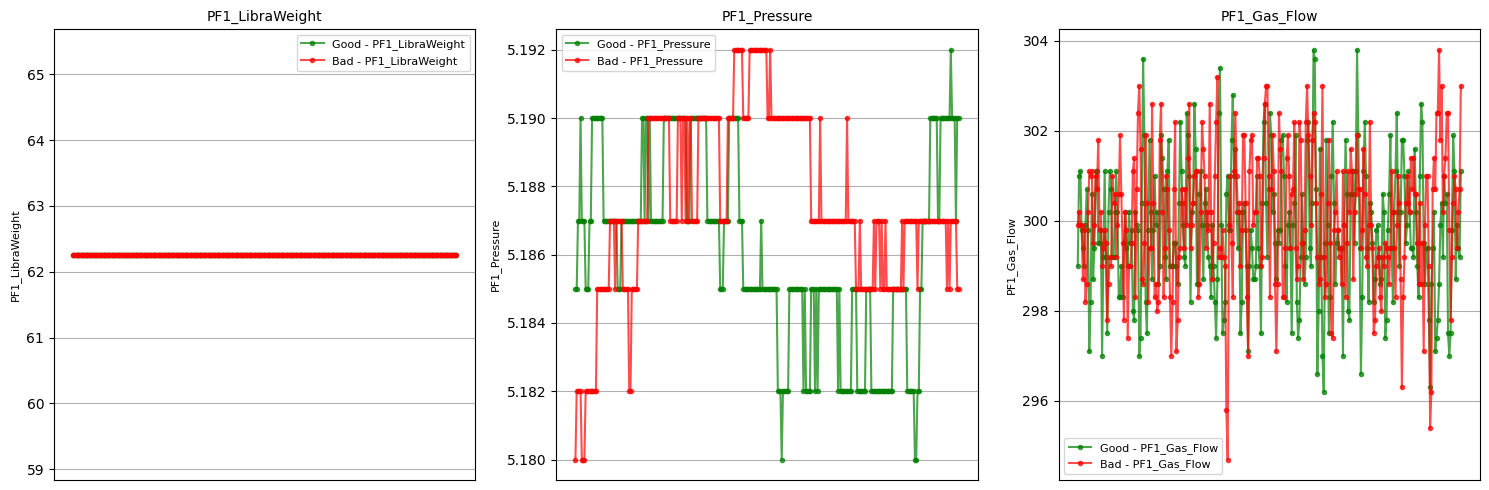

In [5]:
# List of columns for y-axis
y_columns = ["PF1_LibraWeight", "PF1_Pressure", "PF1_Gas_Flow"]
plot_columns_in_grid_overlay(g_nozzle_df, b_nozzle_df, y_columns, nrows=1, ncols=3, figsize=(15, 5), graph_name=f"../graphs/{g_csv_name}-vs-{b_csv_name}_pf1.png")


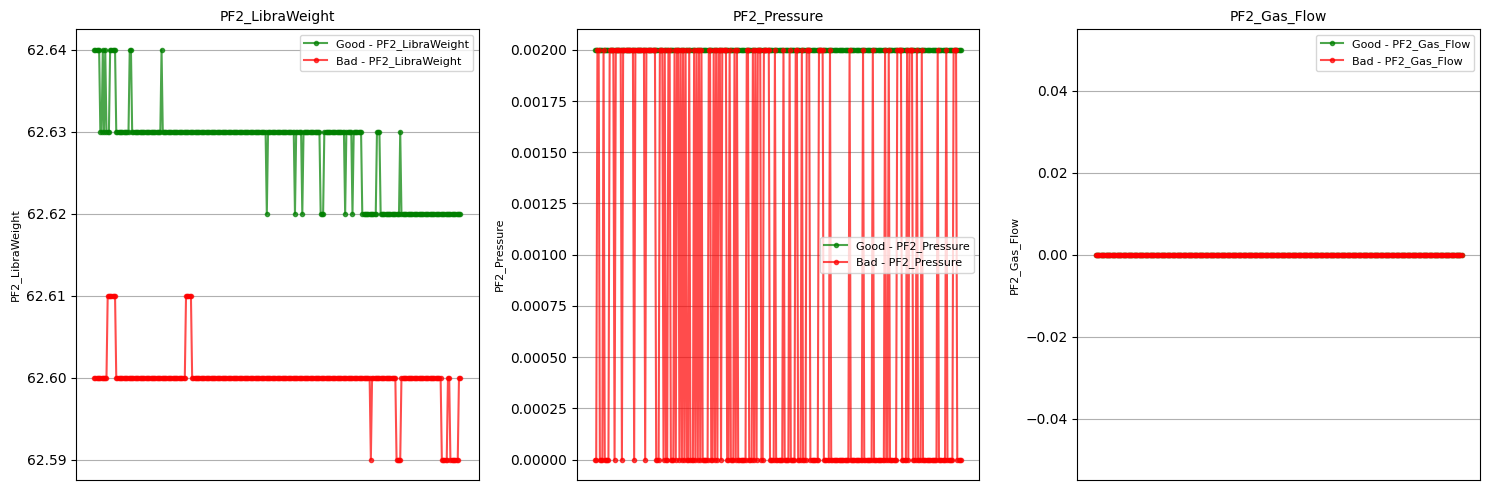

In [6]:
# List of columns for y-axis
y_columns = ["PF2_LibraWeight", "PF2_Pressure", "PF2_Gas_Flow"]
plot_columns_in_grid_overlay(g_nozzle_df, b_nozzle_df, y_columns, nrows=1, ncols=3, figsize=(15, 5), graph_name=f"../graphs/{g_csv_name}-vs-{b_csv_name}_pf2.png")


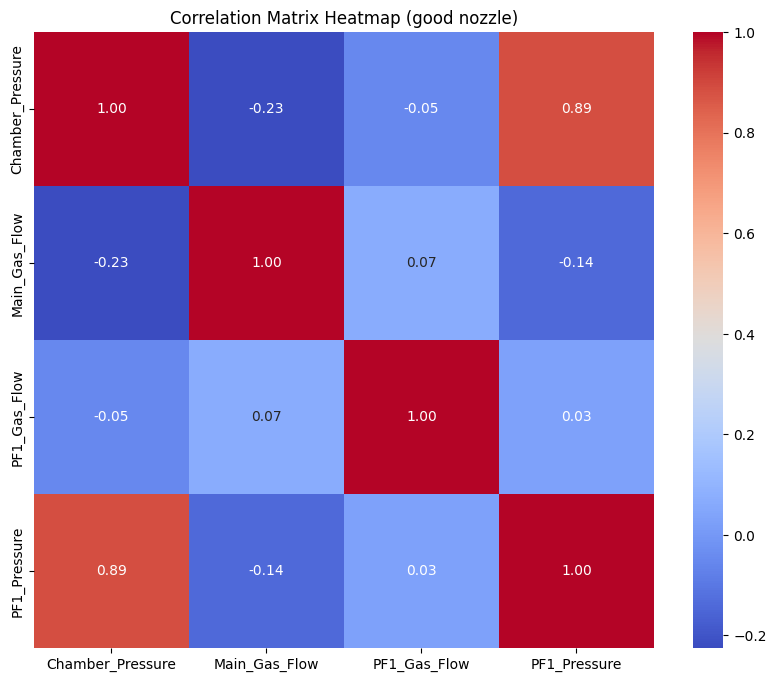

In [7]:
import seaborn as sns
import numpy as np

pros_param = ["Chamber_Pressure", "Main_Gas_Flow", "PF1_Gas_Flow", "PF1_Pressure"]

# Filter the DataFrame for good nozzle process parameters
g_pros_param_df = g_nozzle_df[pros_param]

# Compute the covariance matrix
g_corr_matrix = g_pros_param_df.corr(method='spearman')  # or 'kendall'

# Visualization (Optional)
plt.figure(figsize=(10, 8))
sns.heatmap(g_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix Heatmap (good nozzle)")
plt.savefig(f"../graphs/{g_csv_name}_cor_matrix.png", format="png", dpi=300, bbox_inches="tight")
plt.show()



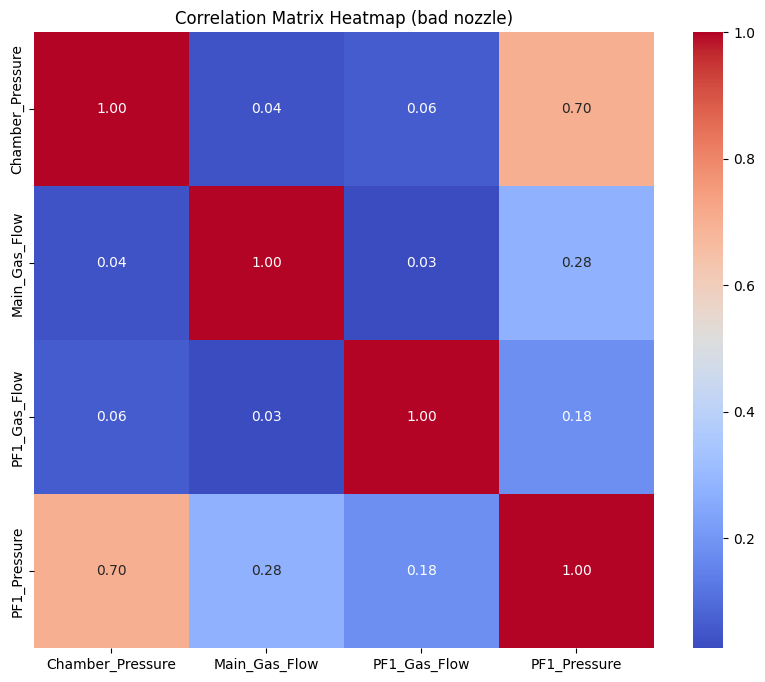

In [8]:
# Filter the DataFrame for process parameters
b_pros_param_df = b_nozzle_df[pros_param]

# Compute the covariance matrix
b_corr_matrix = b_pros_param_df.corr(method='spearman')  # or 'kendall'

# Visualization (Optional)
plt.figure(figsize=(10, 8))
sns.heatmap(b_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix Heatmap (bad nozzle)")
plt.savefig(f"../graphs/{b_csv_name}_cor_matrix.png", format="png", dpi=300, bbox_inches="tight")
plt.show()

Mean of Main Gas Flow (Good Nozzle)              : 1745.3266666666666
Standard Deviation of Main Gas Flow (Good Nozzle): 11.496374307677277
Mean of Main Gas Flow (Bad Nozzle)               : 1770.51
Standard Deviation of Main Gas Flow (Bad Nozzle) : 11.293208873773063


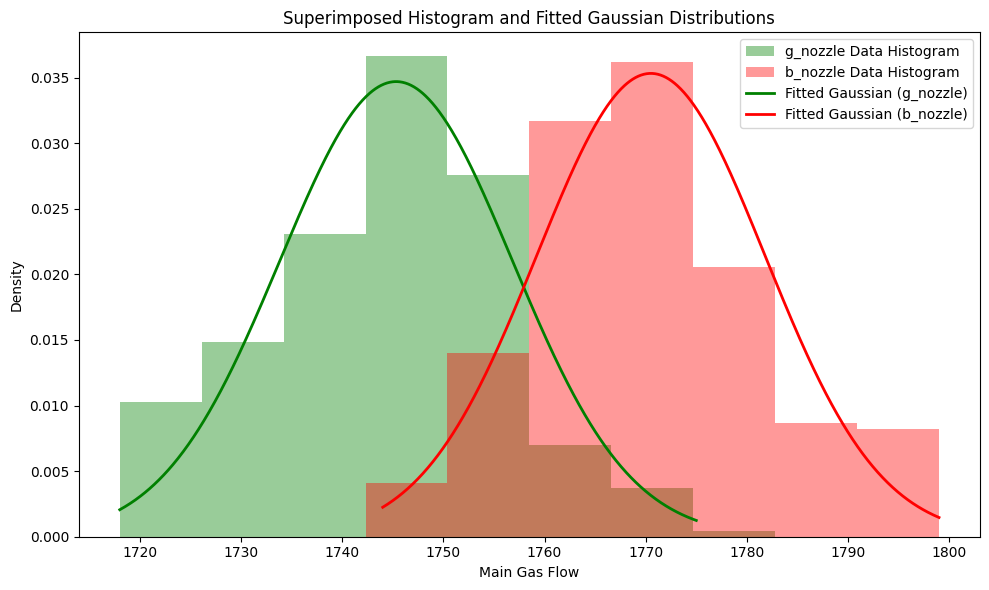

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Assuming g_nozzle_df["Main_Gas_Flow"] and b_nozzle_df["Main_Gas_Flow"] are available
g_main_gas_flow = g_pros_param_df["Main_Gas_Flow"]
b_main_gas_flow = b_pros_param_df["Main_Gas_Flow"]

# Calculate mean and std for both datasets
mean_g = np.mean(g_main_gas_flow)
std_g = np.std(g_main_gas_flow)

mean_b = np.mean(b_main_gas_flow)
std_b = np.std(b_main_gas_flow)

# Fit Gaussian distributions
x_g = np.linspace(min(g_main_gas_flow), max(g_main_gas_flow), 1000)
pdf_fitted_g = norm.pdf(x_g, mean_g, std_g)

x_b = np.linspace(min(b_main_gas_flow), max(b_main_gas_flow), 1000)
pdf_fitted_b = norm.pdf(x_b, mean_b, std_b)

# Print mean and std for both
print(f"Mean of Main Gas Flow (Good Nozzle)              : {mean_g}")
print(f"Standard Deviation of Main Gas Flow (Good Nozzle): {std_g}")
print(f"Mean of Main Gas Flow (Bad Nozzle)               : {mean_b}")
print(f"Standard Deviation of Main Gas Flow (Bad Nozzle) : {std_b}")

bins = 10

# Find the global min and max to ensure both histograms have the same range
min_range = min(min(g_main_gas_flow), min(b_main_gas_flow))
max_range = max(max(g_main_gas_flow), max(b_main_gas_flow))

# Plotting histograms and Gaussian fits superimposed
plt.figure(figsize=(10, 6))

# Histogram for g_nozzle with Gaussian fit
plt.hist(g_main_gas_flow, bins=bins, density=True, alpha=0.4, color='g', label='g_nozzle Data Histogram', range=(min_range, max_range))

# Histogram for b_nozzle with Gaussian fit
plt.hist(b_main_gas_flow, bins=bins, density=True, alpha=0.4, color='r', label='b_nozzle Data Histogram', range=(min_range, max_range))

# Plot fitted Gaussian distributions
plt.plot(x_g, pdf_fitted_g, 'g', linewidth=2, label='Fitted Gaussian (g_nozzle)')
plt.plot(x_b, pdf_fitted_b, 'r', linewidth=2, label='Fitted Gaussian (b_nozzle)')

# Adding labels and legend
plt.title('Superimposed Histogram and Fitted Gaussian Distributions')
plt.xlabel('Main Gas Flow')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.savefig(f"../graphs/{g_csv_name}-vs-{b_csv_name}_hist.png", format="png", dpi=300, bbox_inches="tight")
plt.show()


### Unsupervised Learning

Mahalanobis Distance

In [ ]:
from distancia import Mahalanobis
from scipy.stats import chi2

def flag_anomalies(distances, threshold):
    """
    Flags anomalies based on a chi-squared threshold.
    :param distances: Mahalanobis distances of the data points.
    :param threshold: Threshold to determine anomaly.
    :return: Boolean mask of anomalies.
    """
    return distances > threshold

good_data = g_pros_param_df.to_numpy()
unseen_data = b_pros_param_df.to_numpy()

# Initialize an empty array to store the distances
distances = []

# Loop through each data point in unseen_data
for point in unseen_data:
    # Compute the Mahalanobis distance for the current point
    distance = Mahalanobis().calculate(point, good_data)
    # Append the result to the distances array
    distances.append(distance)

# Convert the list of distances to a NumPy array for further processing
distances = np.array(distances)

# Determine threshold using chi-squared distribution (99% confidence level)
dof = good_data.shape[1]-1  # Degrees of freedom (number of features)
chi2_threshold = chi2.ppf(0.90, dof)

# Flag anomalies
anomalies = flag_anomalies(distances, chi2_threshold)

# Output results
b_pros_param_df.loc[:, ('Mahalanobis_Distance')] = distances
b_pros_param_df.loc[:, ('Is_Anomaly')] = anomalies

print(f"Degree of Freedom: {dof}")
print(f"Chi2_Threshold: {chi2_threshold}")
print(f"Anomalies flagged: {np.sum(anomalies)}")

b_pros_param_df



Degree of Freedom: 4
Chi2_Threshold: 6.251388631170325
Anomalies flagged: 0


C:\Users\yongz\AppData\Local\Temp\ipykernel_32252\3605021364.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b_pros_param_df.loc[:, ('Mahalanobis_Distance')] = distances
C:\Users\yongz\AppData\Local\Temp\ipykernel_32252\3605021364.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b_pros_param_df.loc[:, ('Is_Anomaly')] = anomalies


,Chamber_Pressure,Main_Gas_Flow,PF1_Gas_Flow,PF1_Pressure,Mahalanobis_Distance,Is_Anomaly
0,4.998,1782,299.9,5.180,5.470736,False
1,4.998,1782,300.2,5.182,4.434002,False
2,4.998,1779,299.9,5.182,4.194543,False
3,4.998,1779,299.9,5.182,4.194543,False
4,4.998,1773,298.7,5.182,3.782585,False
...,...,...,...,...,...,...
295,4.998,1770,300.7,5.187,2.282487,False
296,4.998,1773,299.4,5.187,2.530796,False
297,4.998,1772,300.2,5.187,2.404983,False
298,4.998,1772,300.7,5.185,2.540804,False


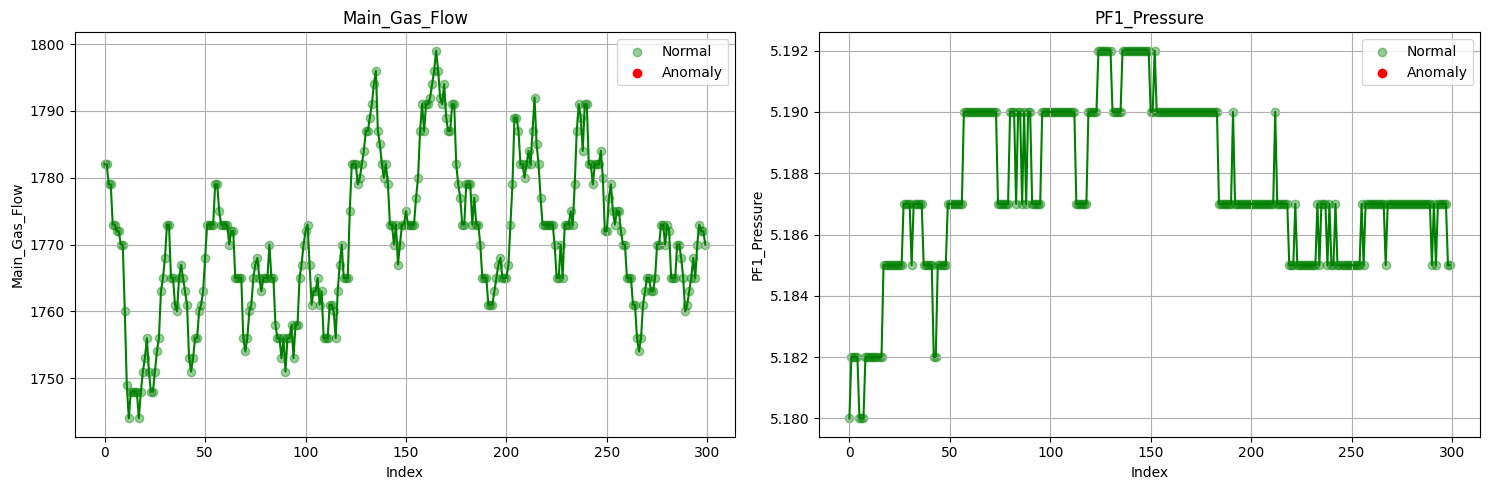

In [11]:
# Define the columns to plot
y_columns = ["Main_Gas_Flow", "PF1_Pressure"]

# Separate anomalies and normal data
anomalies_data = b_pros_param_df[b_pros_param_df["Is_Anomaly"]]
normal_data = b_pros_param_df[~b_pros_param_df["Is_Anomaly"]]

# Create subplots for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot for the first column
axes[0].scatter(normal_data.index, normal_data[y_columns[0]], color="green", label="Normal", alpha=0.4)
axes[0].plot(b_pros_param_df[y_columns[0]], color='g')
axes[0].scatter(anomalies_data.index, anomalies_data[y_columns[0]], color="red", label="Anomaly")
axes[0].set_title(y_columns[0], fontsize=12)
axes[0].set_xlabel("Index")
axes[0].set_ylabel(y_columns[0])
axes[0].legend()
axes[0].grid(True)

# Plot for the second column
axes[1].scatter(normal_data.index, normal_data[y_columns[1]], color="green", label="Normal", alpha=0.4)
axes[1].plot(b_pros_param_df[y_columns[1]], color='g')
axes[1].scatter(anomalies_data.index, anomalies_data[y_columns[1]], color="red", label="Anomaly")
axes[1].set_title(y_columns[1], fontsize=12)
axes[1].set_xlabel("Index")
axes[1].set_ylabel(y_columns[1])
axes[1].legend()
axes[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.savefig(f"../graphs/{g_csv_name}-vs-{b_csv_name}_MD.png", format="png", dpi=300, bbox_inches="tight")
plt.show()


Elliptic Envelope